In [5]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
from sklearn.linear_model import SGDRegressor

## Kaggle Competition 

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/submit

Ames Housing Set

* 81 col variables in original data set
* residential homes in Ames, Iowa

Outline
* use data to build price prediction model
* evaluate ordinal and non ordinal data 
* transform nominal data using one hot encoding where relevent


In [7]:
# create data frame
df = pd.read_csv('data/train.csv')


In [8]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [9]:
# 81 columns 
# list form for readability

df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [80]:
# rows, col
df.shape

(1460, 81)

Shape: 
1,460 rows
81 col

In [10]:
# .corr 
# checks numerical features only
# check for correlation with sale price
# sort desc order 
# highter # - strong corr with our Y predicotor: 'Sale Price'

df_corr = df.corr()['SalePrice'].abs().sort_values(ascending=False)
df_corr


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

#### .CORR 
* OverallQual   0.790982 
* GrLivArea     0.708624
* TotalBsmtSF   0.613581
* GarageCars    0.640409
* GarageArea    0.623431

list of features with high posative correlation  to price 
* since there are already numerical no additional data manupulation is needed for these features 
* include these feautures in model

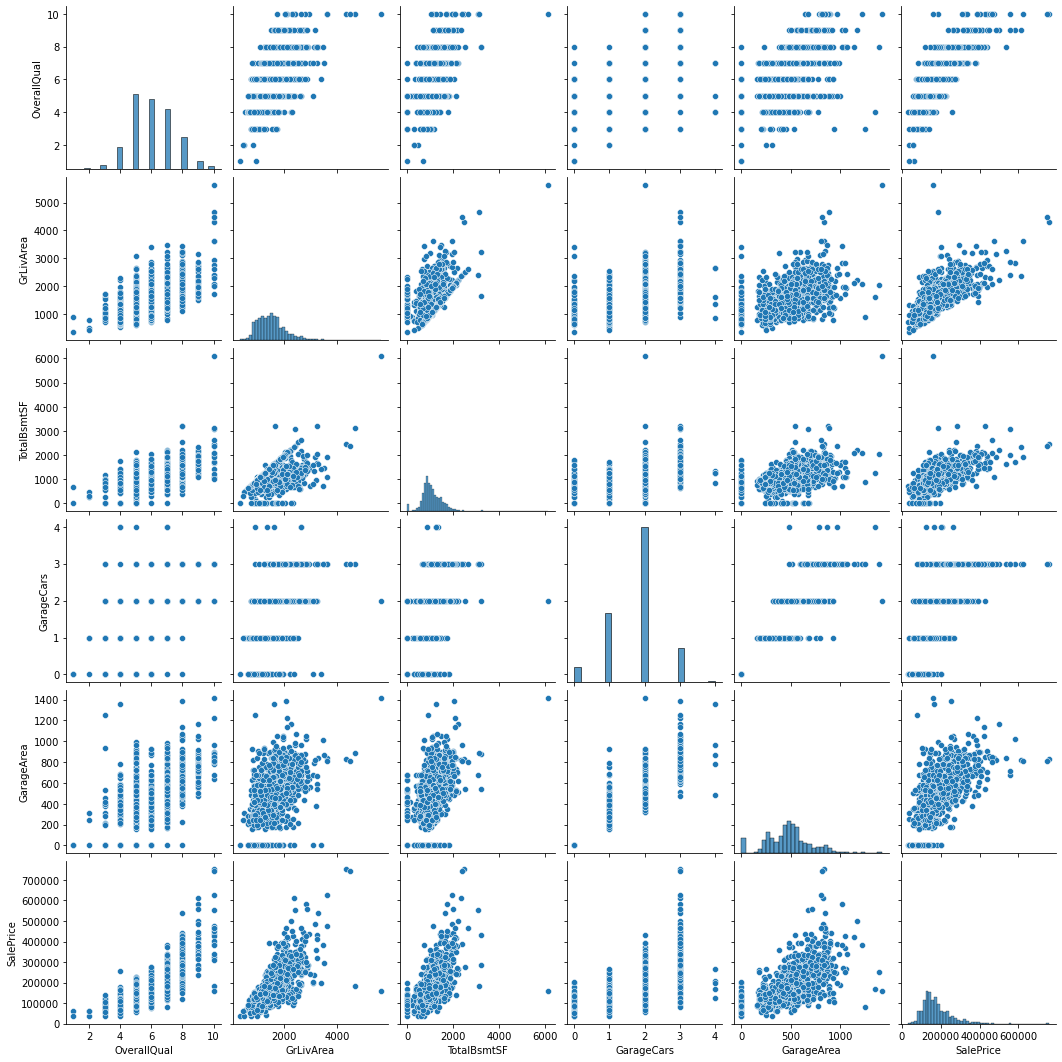

In [15]:
# create list called col with high correlated features 
# pair plot to show correlations

col = ['OverallQual', 'GrLivArea', 'TotalBsmtSF',\
       'GarageCars', 'GarageArea', 'SalePrice']
sns.pairplot(data= df[col])

In [16]:
# create list of col
# check for nulls on selected features only
df[['OverallQual','GarageCars',\
    'GarageArea', 'GrLivArea','TotalBsmtSF' ]].isnull().sum()

OverallQual    0
GarageCars     0
GarageArea     0
GrLivArea      0
TotalBsmtSF    0
dtype: int64

In [17]:
# check distribution of each of these features

In [18]:
df.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

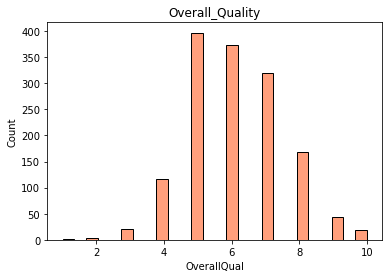

In [19]:
sns.histplot(x=df.OverallQual, color='coral').set_title('Overall_Quality')
plt.show()

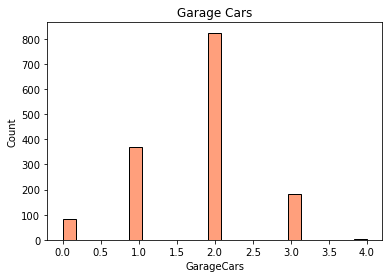

In [20]:
sns.histplot(x=df.GarageCars, color='coral').set_title('Garage Cars')
plt.show()

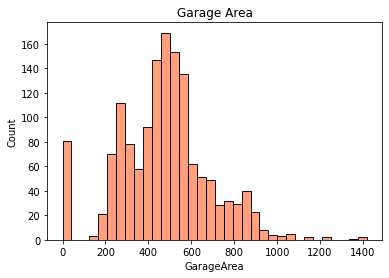

In [21]:
sns.histplot(x=df.GarageArea, color='coral').set_title('Garage Area')
plt.show()

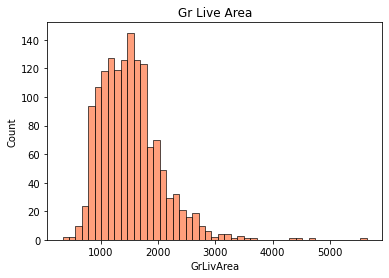

In [22]:
sns.histplot(x=df.GrLivArea, color='coral').set_title('Gr Live Area')
plt.show()

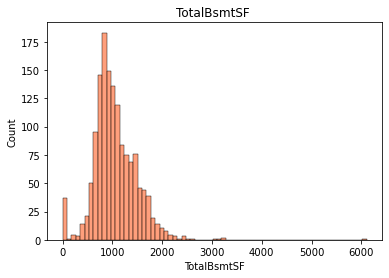

In [23]:
sns.histplot(x=df.TotalBsmtSF, color='coral' ).set_title('TotalBsmtSF ')
plt.show()

Observation normalish distributions 
* lets zoom in on Garage area 
* can be a little smoother

In [24]:
GarageArea_smooth = np.log(df['GarageArea'].values)

#replacement_values = np.log(neighborhood_one_hot_with_lot_area['LotArea'].values)
# warning like you cant have zero in .log
# check dist

<ipython-input-24-578b2a044323>:1: RuntimeWarning: divide by zero encountered in log
  GarageArea_smooth = np.log(df['GarageArea'].values)


In [26]:
sns.distplot(x=GarageArea_smooth)

SyntaxError: invalid syntax (<ipython-input-26-f89a46a9357b>, line 1)

In [99]:
# check for nulls
df[['OverallQual',\
    'GrLivArea','TotalBsmtSF',\
    'GarageCars', 'GarageArea']].isnull().sum()

OverallQual    0
GrLivArea      0
TotalBsmtSF    0
GarageCars     0
GarageArea     0
dtype: int64

* no nulls
* ready to use in data


#### PRICE 

In [100]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

mean, max and percentiles all represented for price

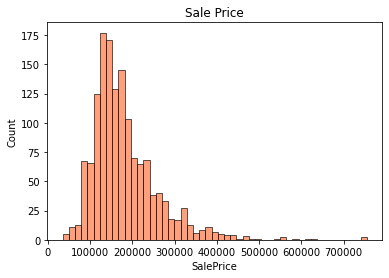

In [101]:
sns.histplot(df.SalePrice, color='coral').set_title("Sale Price")
plt.show()

In [102]:
min_price = df.SalePrice.min()
max_price = df.SalePrice.max()

In [103]:
print(f'Min price: ${min_price} \nMax price: ${max_price} ')

Min price: $34900 
Max price: $755000 


In [104]:
under_100=df.loc[df['SalePrice']<100000]
under_100.shape


(114, 81)

In [105]:
over_500 =df.loc[df['SalePrice']>400000]
over_500.shape

(28, 81)

* min price is very low 
* 114 homes < 100k
* 28 > 400k
* consider removing outliers
* can log function be applied to prediction price? 

### -- EDA MSSubClass

In [106]:
df.MSSubClass.unique().tolist()

[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40]

In [107]:
df.MSSubClass.nunique()

15

15 classifications of bldg types

#### obervations
* according to data documentation
* number represent classifcation of bldg structure
* seems like a good feature to use for predicting home prices

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [108]:
# accidentally re ran this cell
df.MSSubClass.dtype

dtype('int64')

In [109]:
# col values are ints 
# they represesnt catagories can be transformed to str
df['MSSubClass']= df['MSSubClass'].astype(str)

In [110]:
df.MSSubClass.dtype

dtype('O')

In [111]:
# pivot table 
# count of bldg types by neighborhood
class_pivot = pd.pivot_table(df, index ='Neighborhood', columns='MSSubClass', values='Id', aggfunc='count', fill_value=0)
class_pivot

MSSubClass,120,160,180,190,20,30,40,45,50,60,70,75,80,85,90
Neighborhood,,,,,,,,,,,,,,,
Blmngtn,16,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Blueste,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
BrDale,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0
BrkSide,0,0,0,2,3,16,1,4,25,0,6,1,0,0,0
ClearCr,2,0,0,0,8,0,1,0,6,7,1,0,3,0,0
CollgCr,10,0,0,0,81,0,0,0,0,53,0,0,3,3,0
Crawfor,3,0,0,1,11,4,0,1,9,0,19,1,0,0,2
Edwards,0,4,3,4,36,12,0,0,20,4,3,0,4,2,8
Gilbert,0,0,0,1,10,0,0,0,1,60,0,0,7,0,0


In [112]:
# pivtot table 
# count of SubClass
class_pivot2 = pd.pivot_table(df, \
                              index='MSSubClass', \
                              values='Id', aggfunc='count')
class_pivot2

,Id
MSSubClass,
120,87
160,63
180,10
190,30
20,536
30,69
40,4
45,12
50,144


In [113]:
df.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

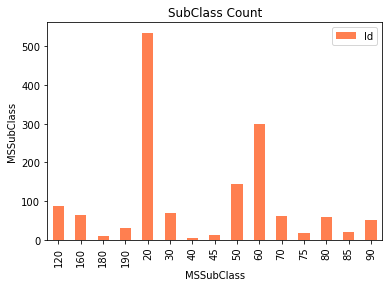

In [114]:
class_pivot2.plot(kind='bar', color='coral',\
                  ylabel='MSSubClass').set_title('SubClass Count')
plt.show()

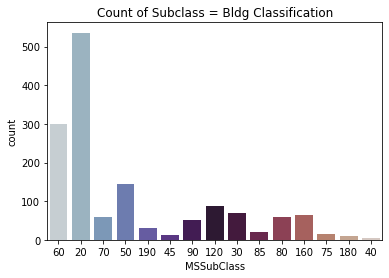

In [115]:
# pivot table (countplot) in seaborn

ax = sns.countplot(data = df, \
                   x='MSSubClass', palette = "twilight")
plt.title('Count of Subclass = Bldg Classification')
plt.show()

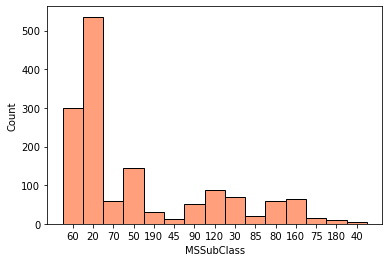

In [116]:
sns.histplot(x = df['MSSubClass'], color ='Coral')
plt.show()

## MSsubclass
* conclusion interesting to see the breakdown of sub class 
* count by neighboorhood might be interesting to explore in the future 
* creating pivot table and then plt from pivot table was extra step
* easier to do countplot in seaborn or histplot in seaborn
* 1/3 of the listings are 1 fam home post 1946 but this is still a useful feature for price predition 
* will transform this into feature hot encoded for use in model

## One Hot Encode

In [117]:
# tranform this nominal data 
bldg_class = pd.get_dummies(df.MSSubClass)
bldg_class.shape

(1460, 15)

shape confirms
* 15 unique values in MsSubClass
* are now 15 new columns in new df

In [118]:
bldg_class.head(2)

,120,160,180,190,20,30,40,45,50,60,70,75,80,85,90
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### EDA CONT
* identify conditions helpful in predicting price

### Ratings 

In [119]:
df.OverallCond.unique().tolist()

[5, 8, 6, 7, 4, 2, 3, 9, 1]

In [120]:
df.OverallQual.unique().tolist()

[7, 6, 8, 5, 9, 4, 10, 3, 1, 2]

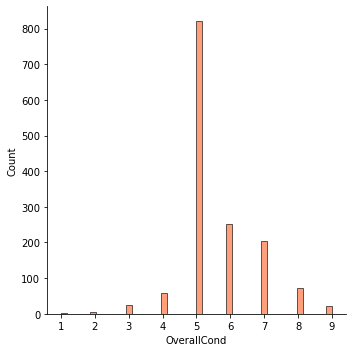

In [121]:
sns.displot(df.OverallCond, color = 'coral')


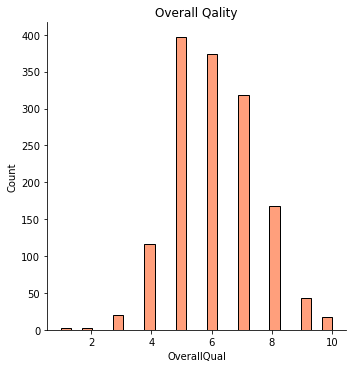

In [122]:
sns.displot(df.OverallQual, color='coral')
plt.title("Overall Qality")
plt.show()

# Overall Quality 
* 1-10 rating 
* highly correlated to sale price and has normal dist
* excellent choice for use to predict price
* overall condition appears less useful and will NOT be used in model

### EDA - NOMINAL DATA 

#### SALE CONDITION

In [123]:
df.SaleCondition.unique().tolist()

['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family']

In [124]:
df.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

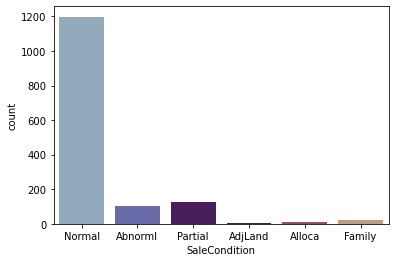

In [125]:
# values are str
# cannot plot for normal dist without pivot / count

ax = sns.countplot(data = df,\
                   x='SaleCondition',  palette = "twilight")

####  Analysis: sale condition 
 * overwhelming majority of sales are 'normal'
 * (1198/1460) 
 * this feature will NOT be helpful predicting sale price
 * sale condition will NOT be used in model


#### BLDG TYPE 

In [126]:
df.BldgType.unique().tolist()

['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']

In [127]:
df.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

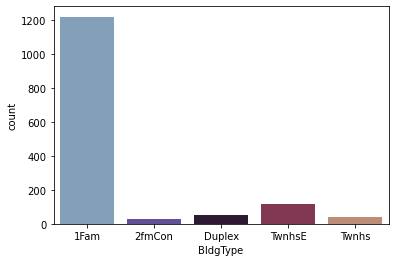

In [128]:
ax = sns.countplot(data = df, \
                   x='BldgType',  palette = "twilight")

####  Analysis: building type 
 * since majority of sales are '1fam' 
 * 1220/1460
 * not normal dist
 * this feature will NOT be helpful predicting sale price
 * building type will NOT be used in model


#### EDA -  Ordinal Data that needs transformation

In [129]:
 df.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [130]:
df.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [131]:
df.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

### Analysis:  external conditions / quality
per data notes: 
* ExterQual:quality of exterior material
* ExterCond: evaluates the present condition of the exterial material
* Ratings key:
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

* next step: transform

In [132]:
# create mini df
# :: all rows

external_df = df.loc[::,['ExterCond', 'ExterQual']]
external_df.head(2)

,ExterCond,ExterQual
0,TA,Gd
1,TA,TA


In [133]:
# confirm all size
external_df.shape

(1460, 2)

In [134]:
# create dict of ratings 
# map dict values to replace objects/str
ratings = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
external_df['ExterQual'] = external_df['ExterQual'].map(ratings)

In [135]:
external_df.head(2)

,ExterCond,ExterQual
0,TA,4
1,TA,3


In [136]:
# repeat
external_df['ExterCond'] = external_df['ExterCond'].map(ratings)

In [137]:
external_df.head(2)

,ExterCond,ExterQual
0,3,4
1,3,3


### building df for model 

In [138]:
# 5 features highly correlated with sales price 
# no adjustments needed 
model_df = df.loc[::,['OverallQual',\
                      'GrLivArea','TotalBsmtSF',\
                      'GarageCars', 'GarageArea']]
model_df.head(2)

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea
0,7,1710,856,2,548
1,6,1262,1262,2,460


looking good so far
5 columns in df

In [139]:
# create a copy for future modeling 
# check errors etc
training_model_copy = model_df.copy()

In [140]:
# add external df to model df
model_df = pd.concat([model_df, external_df], axis=1)
model_df.shape

(1460, 7)

In [141]:
model_df.head(2)

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,ExterCond,ExterQual
0,7,1710,856,2,548,3,4
1,6,1262,1262,2,460,3,3


In [142]:
# add one hot encoded df
model_df = pd.concat([model_df, bldg_class], axis=1)
model_df.head(2)



,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,ExterCond,ExterQual,120,160,180,...,30,40,45,50,60,70,75,80,85,90
0,7,1710,856,2,548,3,4,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,6,1262,1262,2,460,3,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
model_df.shape

(1460, 22)

In [144]:
model_df['SalePrice']=df.SalePrice
model_df.head(2)

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,ExterCond,ExterQual,120,160,180,...,40,45,50,60,70,75,80,85,90,SalePrice
0,7,1710,856,2,548,3,4,0,0,0,...,0,0,0,1,0,0,0,0,0,208500
1,6,1262,1262,2,460,3,3,0,0,0,...,0,0,0,0,0,0,0,0,0,181500


In [145]:
model_df.columns.nunique()

23

<AxesSubplot:>

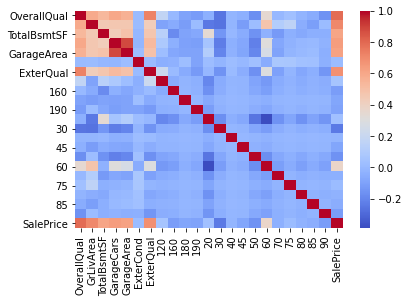

In [146]:
sns.heatmap(model_df.corr(), cmap='coolwarm') 

## REGRESSION 

In [147]:
# regression 
# create x value, and y value(saleprice ) 

reg = linear_model.LinearRegression()

x = model_df.drop(labels='SalePrice', axis = 1)
y = model_df.SalePrice

FIT 

In [148]:
reg.fit(x,y)

LinearRegression()

SCORE

In [149]:
reg.score(x,y)

0.789146603723871

In [150]:
#doesnt this have to be testing set?
#testing is on another file

predictions = reg.predict(x)
predictions

array([221448.62136884, 172610.85287134, 227055.07854072, ...,
       256800.16768503, 127237.38485005, 163418.09029113])

## TEST DATASET 

In [181]:
# needed to create this for troubleshooting 
# lesson leaened:  do this at the start 
problem = pd.read_csv('/Users/tkhstudent29/Desktop/classwork/DS2022/Week-030/data/test.csv')

In [151]:
test_df = pd.read_csv('/Users/tkhstudent29/Desktop/classwork/DS2022/Week-030/data/test.csv')

In [152]:
test_df.shape

(1459, 80)

testing database similar in size to training db

In [153]:
# test df

# add features highly correlated with sales price 
# no adjustments needed 
test_model_df = test_df.loc[::,['OverallQual',\
                      'GrLivArea','TotalBsmtSF',\
                      'GarageCars', 'GarageArea']]

# create mini dataframe with all rows 
# these two conditions External Ratings
test_external_df = test_df.loc[::,['ExterCond', 'ExterQual']]

# create dict of ratings 
# map dict values to replace objects/str
ratings = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

test_external_df['ExterQual'] = test_external_df['ExterQual'].map(ratings)
test_external_df['ExterCond'] = test_external_df['ExterCond'].map(ratings)

# concat this df to model df
test_model_df = pd.concat([test_model_df, test_external_df], axis=1)

#one hot encode bldg class
test_bldg_class = pd.get_dummies(test_df.MSSubClass)

# concat this df to model df
test_model_df = pd.concat([test_model_df, test_bldg_class], axis=1)


In [154]:
test_model_df.head(3)

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,ExterCond,ExterQual,20,30,40,...,70,75,80,85,90,120,150,160,180,190
0,5,896,882.0,1.0,730.0,3,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,1329,1329.0,1.0,312.0,3,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1629,928.0,2.0,482.0,3,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
test_model_df.shape

(1459, 23)

#### ISSUE: 
* problem there are now 23 columns 
##### discovery:
* edited testing data set had extra col
* analysis uncovered that extra col:
* was '150' from one hot encoded MSSubclass 
##### solution:
* col containing the col head will now be dropped

In [192]:
# number of col created from training dataset transformation
df.MSSubClass.nunique()

15

In [194]:
# number of col created from testing dataset transformation  
problem.MSSubClass.nunique()

16

In [198]:
# visually checking for which col is "extra" in testing set
# discovered it was 150
test_model_df.columns.unique().tolist()

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea',
 'ExterCond',
 'ExterQual',
 20,
 30,
 40,
 45,
 50,
 60,
 70,
 75,
 80,
 85,
 90,
 120,
 150,
 160,
 180,
 190]

In [199]:
# drop entire col with label (col header) 150
test_model_df.drop(labels=150, axis=1, inplace=True)

In [200]:
# confirm that col (150) was dropped 
test_model_df.shape

(1459, 22)

In [156]:
# check tresting data for null values before plugging into model
test_model_df.isnull().sum()

OverallQual    0
GrLivArea      0
TotalBsmtSF    1
GarageCars     1
GarageArea     1
ExterCond      0
ExterQual      0
20             0
30             0
40             0
45             0
50             0
60             0
70             0
75             0
80             0
85             0
90             0
120            0
150            0
160            0
180            0
190            0
dtype: int64

In [157]:
# cant have null, NaNs in data set when using model
# replace with zero

test_model_df = test_model_df.fillna(0)


In [158]:
# confirm no nulls
test_model_df.isnull().sum()

OverallQual    0
GrLivArea      0
TotalBsmtSF    0
GarageCars     0
GarageArea     0
ExterCond      0
ExterQual      0
20             0
30             0
40             0
45             0
50             0
60             0
70             0
75             0
80             0
85             0
90             0
120            0
150            0
160            0
180            0
190            0
dtype: int64

### PREDICTION 
###### USING REGRESSION MODEL FROM TRAINING SET 

In [159]:
# do you need to run for test data or only predict from test data

# regression 
# create x value, and y value(saleprice ) 

# reg = linear_model.LinearRegression()

# x = test_model
# y = test_df.SalePrice

In [160]:
# reg.fit(x,y)
# reg.score(x,y)

In [202]:
# use dot notation from model reg to predict testing model 

predictions = reg.predict(test_model_df)

In [203]:
# add prediction sales price to df w SalePrice as col header
test_model_df['SalePrice'] = predictions

In [204]:
# Save the data
#to_csv.to_csv('export_dataframe_final_sub.csv', index = False, header= True)

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,ExterCond,ExterQual,20,30,40,...,70,75,80,85,90,120,160,180,190,SalePrice
0,5,896,882.0,1.0,730.0,3,3,1,0,0,...,0,0,0,0,0,0,0,0,0,99241.087969
1,6,1329,1329.0,1.0,312.0,3,3,1,0,0,...,0,0,0,0,0,0,0,0,0,147956.918745


In [212]:
test_model_df.shape

(1459, 24)

## FOR KAGGLE SUBMISSION 

In [205]:
test_model_df['Id'] = test_df['Id']
test_model_df

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,ExterCond,ExterQual,20,30,40,...,75,80,85,90,120,160,180,190,SalePrice,Id
0,5,896,882.0,1.0,730.0,3,3,1,0,0,...,0,0,0,0,0,0,0,0,99241.087969,1461
1,6,1329,1329.0,1.0,312.0,3,3,1,0,0,...,0,0,0,0,0,0,0,0,147956.918745,1462
2,5,1629,928.0,2.0,482.0,3,3,0,0,0,...,0,0,0,0,0,0,0,0,161888.184619,1463
3,6,1604,926.0,2.0,470.0,3,3,0,0,0,...,0,0,0,0,0,0,0,0,178669.743329,1464
4,8,1280,1280.0,2.0,506.0,3,4,0,0,0,...,0,0,0,0,1,0,0,0,186236.937793,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,546.0,0.0,0.0,3,3,0,0,0,...,0,0,0,0,0,1,0,0,81834.213083,2915
1455,4,1092,546.0,1.0,286.0,3,3,0,0,0,...,0,0,0,0,0,1,0,0,95665.211543,2916
1456,5,1224,1224.0,2.0,576.0,3,3,1,0,0,...,0,0,0,0,0,0,0,0,135711.521599,2917
1457,5,970,912.0,0.0,0.0,3,3,0,0,0,...,0,0,1,0,0,0,0,0,92701.900941,2918


In [213]:
submission_df = test_model_df[['Id','SalePrice']]

In [214]:
# Save the data
submission_df.to_csv('export_dataframe_final_sub.csv', index = False, header= True)

In [215]:
submission_df = test_model_df[['Id','SalePrice']]
submission_df.to_csv('/Users/tkhstudent29/Desktop/export_dataframe.csv' , index=False, header=True)

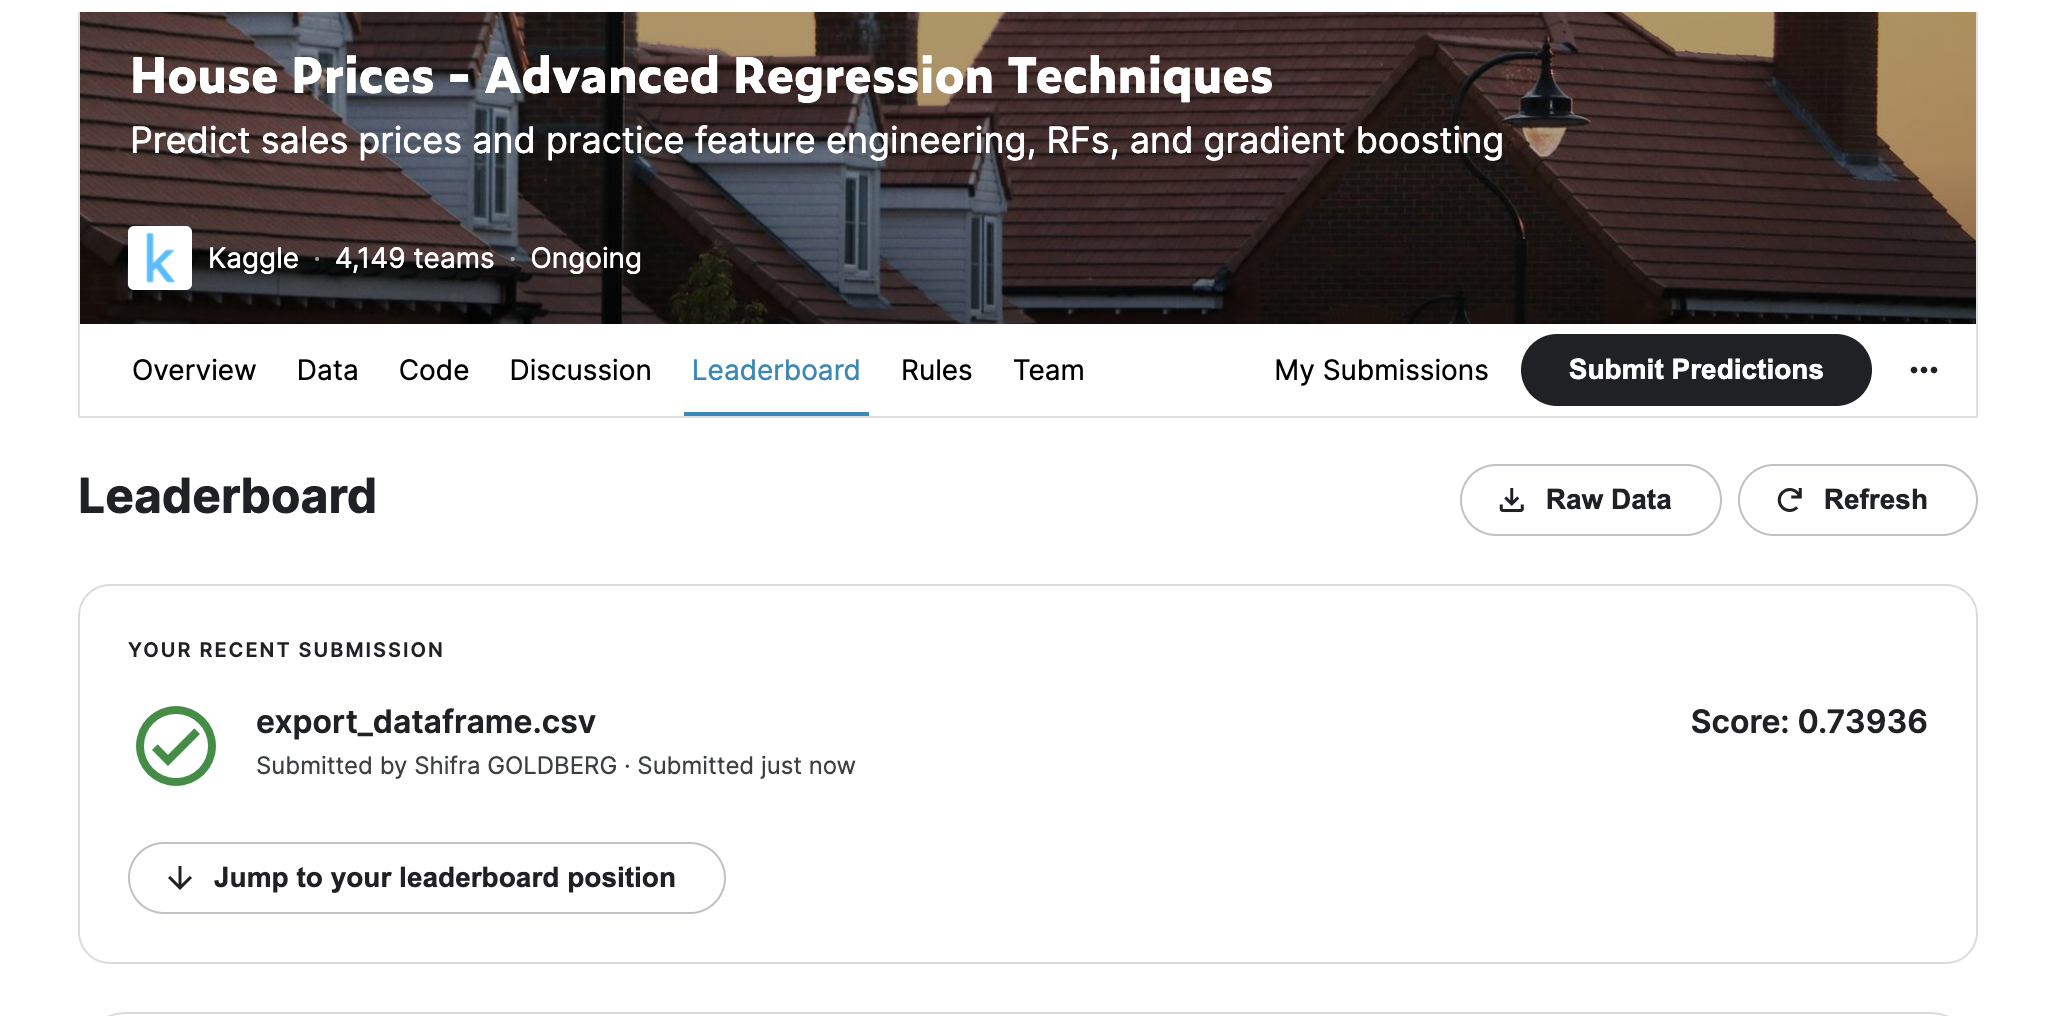